In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import sys
sys.path.append("../")
from pathlib import Path
from argparse import ArgumentParser
warnings.filterwarnings('ignore')

# torch and lightning imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import pytorch_lightning as pl
from torchvision import transforms

from pytorch_lightning.loggers import WandbLogger

import os
#import pycimg
from glob import glob

import cv2

import numpy as np
import matplotlib.pyplot as plt
import random
import json
import datetime
from matplotlib.backends.backend_pdf import PdfPages
import zlib
from PIL import Image
from tqdm import tqdm
from funcs_rayosX import  recorte
from funcs_rayosX import  loadRayosX



np.set_printoptions(precision=2)

In [2]:
usuario=os.getenv('USER')

if usuario=='csanchis':
    directorio_datos='/home/csanchis/mscanData/rayosX/reales2'
elif usuario=='aalbiol':
    directorio_datos='/home/aalbiol/owc/mscanData/rayosX/reales2'
else:
    raise ValueError('Usuario no reconocido')



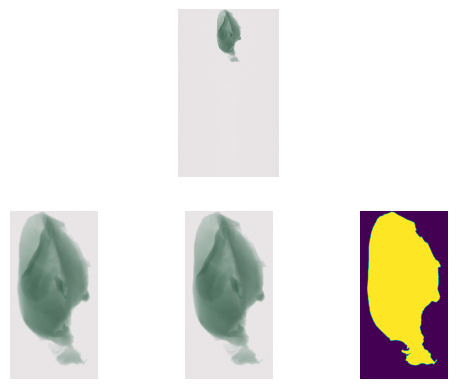

In [3]:
ilow=os.path.join(directorio_datos,"LOWImg_20240923_083508_00024.png")
im,imf=loadRayosX(ilow,maxval=2**16-1,sigma=2)
_=plt.subplot(2,1,1)
_=plt.imshow(imf)
_=plt.axis('off')
out,outf,mi=recorte(im,imf,orla=50)
_=plt.subplot(2,3,4)
_=plt.imshow(outf)
_=plt.axis('off')
_=plt.subplot(2,3,5)
_=plt.imshow(out)
_=plt.axis('off')
_=plt.subplot(2,3,6)
_=plt.imshow(mi)
_=plt.axis('off')

In [7]:

dir_recortes=os.path.join(directorio_datos,"recortes_reales")
user=os.getenv('USER')



 
pgl=glob(directorio_datos+"/LOW*.png")
print(len(pgl))
print(pgl[0])


153
/home/aalbiol/owc/mscanData/rayosX/reales2/LOWImg_20240923_083508_00135.png


In [8]:

#Generar recortes de todas las imagenes
os.makedirs(dir_recortes,exist_ok=True)


maxval=2**16-1
for im in tqdm(pgl):
    bim=os.path.basename(im)
    nameout=os.path.join(dir_recortes,bim)
    
    z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
    assert z is not None
    assert zf is not None
    resultado=recorte(z,zf,threshold=0.8,orla=25)
    if(resultado is None):
        print("El area de carne no es suficiente")
        continue
    out,outf,mi =resultado
    out=(out*maxval).astype(np.uint16)
    cv2.imwrite(nameout,out)
    

100%|██████████| 153/153 [00:51<00:00,  2.96it/s]
